In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import missingno as mnso

import warnings
warnings.filterwarnings('ignore')

geo_path = 'data/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'

In [2]:
commute = pd.read_csv('data/통근통학 수단 자전거.csv', encoding = 'CP949')
commute.head()

,지역구,통근,통학,합계
0,종로구,347,61,408
1,중구,285,37,322
2,용산구,489,78,567
3,성동구,2609,795,3404
4,광진구,3886,1213,5099


In [3]:
commute.shape

(25, 4)

In [5]:
commute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역구     25 non-null     object
 1   통근      25 non-null     int64 
 2   통학      25 non-null     int64 
 3   합계      25 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 928.0+ bytes


In [7]:
to_commute = commute.groupby(['지역구'])[['통근']].agg('sum')
to_commute

,통근
지역구,
강남구,1335
강동구,4028
강북구,1233
강서구,2748
관악구,1437
광진구,3886
구로구,2297
금천구,1078
노원구,3343


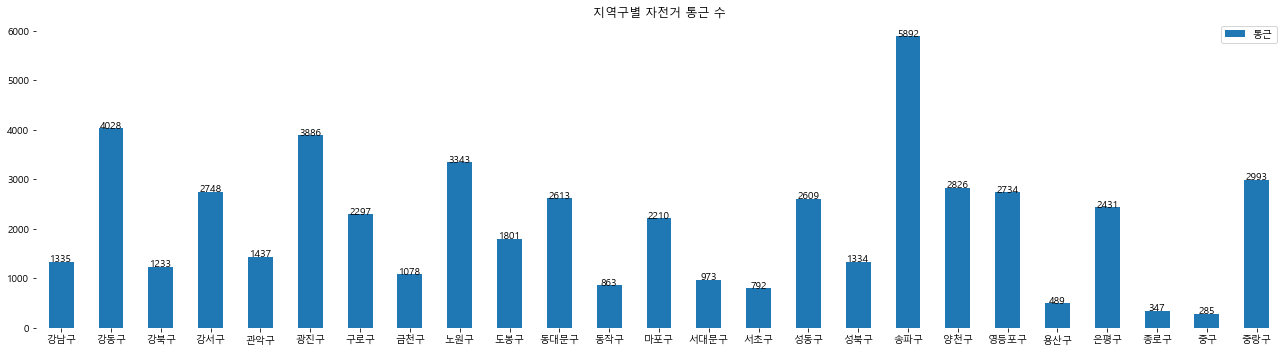

In [8]:
company = commute.groupby(['지역구'])[['통근']].agg('sum')
ax = company.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 자전거 통근 수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

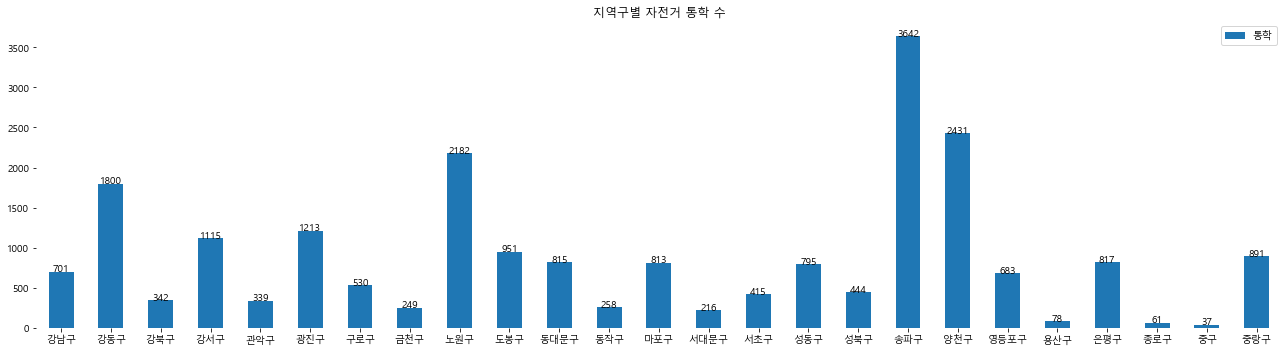

In [10]:
school = commute.groupby(['지역구'])[['통학']].agg('sum')
ax = school.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 자전거 통학 수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

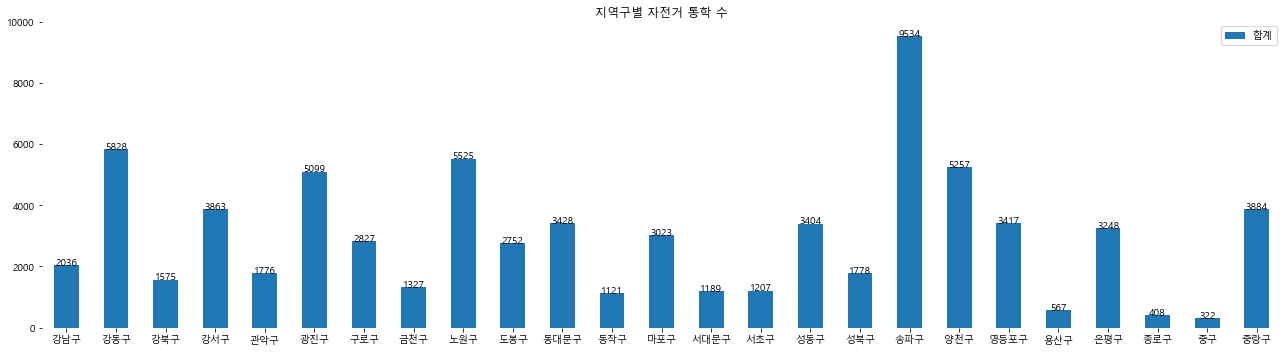

In [20]:
commute_sum = commute.groupby(['지역구'])[['합계']].agg('sum')
ax = commute_sum.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 자전거 통학 수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [11]:
accident = pd.read_csv('data/자전거사고다발지역정보.csv', encoding = 'CP949')
accident.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,"161,307",2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.985544,37.576533,"{""type"":""Polygon"",""coordinates"":[[[126.9871445..."
1,"153,927",2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.981070,37.570279,"{""type"":""Polygon"",""coordinates"":[[[126.9826705..."
2,"153,929",2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.015243,37.572994,"{""type"":""Polygon"",""coordinates"":[[[127.0168437..."
3,"139,637",2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.015435,37.569714,"{""type"":""Polygon"",""coordinates"":[[[127.017036,..."
4,"153,931",2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.961790,37.522868,"{""type"":""Polygon"",""coordinates"":[[[126.9633901..."


In [12]:
accident.shape

(2718, 15)

In [13]:
accident_seoul = accident.loc[accident['시도시군구명'].str.contains('서울특별시')]
accident_seoul.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,"161,307",2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.985544,37.576533,"{""type"":""Polygon"",""coordinates"":[[[126.9871445..."
1,"153,927",2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.981070,37.570279,"{""type"":""Polygon"",""coordinates"":[[[126.9826705..."
2,"153,929",2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.015243,37.572994,"{""type"":""Polygon"",""coordinates"":[[[127.0168437..."
3,"139,637",2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.015435,37.569714,"{""type"":""Polygon"",""coordinates"":[[[127.017036,..."
4,"153,931",2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.961790,37.522868,"{""type"":""Polygon"",""coordinates"":[[[126.9633901..."


In [14]:
accident_seoul['지역구']=accident['지점명'].str.split(" ").str[1]
accident_seoul=accident_seoul.drop(['다발지역폴리곤'], axis='columns')
accident_seoul.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,지역구
0,"161,307",2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.985544,37.576533,종로구
1,"153,927",2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.981070,37.570279,종로구
2,"153,929",2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.015243,37.572994,종로구
3,"139,637",2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.015435,37.569714,중구
4,"153,931",2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.961790,37.522868,용산구


In [25]:
accident_seoul_gu = accident_seoul.groupby(['지역구'])[['발생건수']].agg('sum')
accident_seoul_gu

,발생건수
지역구,
강남구,81
강동구,308
강북구,182
강서구,161
관악구,136
광진구,318
구로구,269
금천구,101
노원구,228


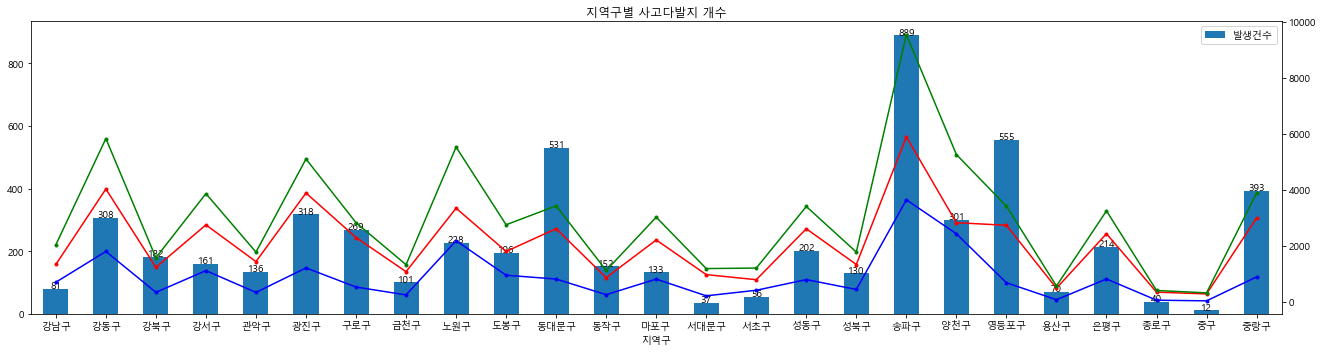

In [26]:
accident_seoul_gu = accident_seoul.groupby(['지역구'])[['발생건수']].agg('sum')

ax = accident_seoul_gu.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 사고다발지 개수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.tight_layout()

plt.twinx() # bar 그래프와 plot 그래프 합치기
plt.plot(company, 'r.-')
plt.plot(school, 'b.-')
plt.plot(commute_sum, 'g.-')
plt.show()

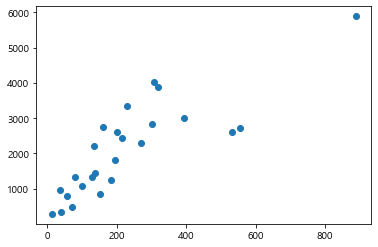

0.8323152377186496

In [28]:
#통근 상관관계 분석
plt.scatter(accident_seoul_gu["발생건수"], company["통근"])
plt.show()
accident_seoul_gu["발생건수"].corr(company["통근"])

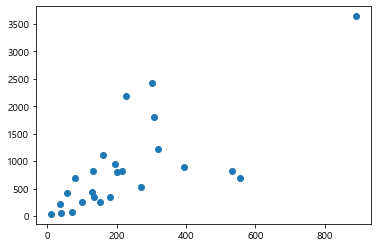

0.7170624241685382

In [30]:
#통학 상관관계 분석
plt.scatter(accident_seoul_gu["발생건수"], school["통학"])
plt.show()
accident_seoul_gu["발생건수"].corr(school["통학"])

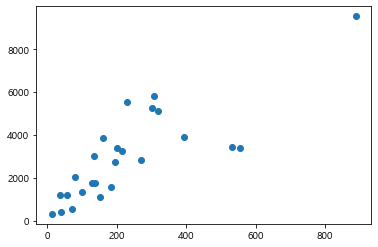

0.8115642738184344

In [31]:
#통근+통학 상관관계 분석
plt.scatter(accident_seoul_gu["발생건수"], commute_sum["합계"])
plt.show()
accident_seoul_gu["발생건수"].corr(commute_sum["합계"])